In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# a. Обработка отсутствующих значений
missing_values = df.isnull().sum()
# Удаляем столбцы с более чем 30% отсутствующих значений
threshold = 0.3 * len(df)
df.dropna(axis=1, thresh=threshold, inplace=True)
# Заполняем оставшиеся пропуски
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# b. Проверка на дубликаты
df.drop_duplicates(inplace=True)

# c. Проверка типов данных
print(df.dtypes)
# Преобразование категориальных переменных в числовые
df = pd.get_dummies(df, drop_first=True)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object


<ipython-input-17-476d9a527193>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


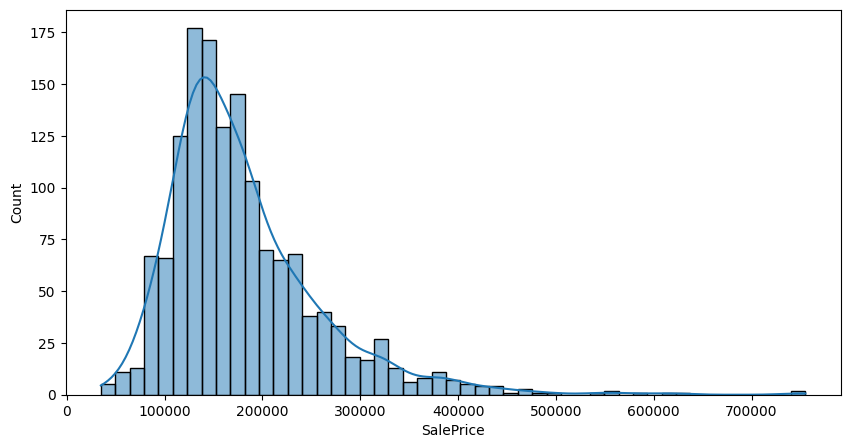

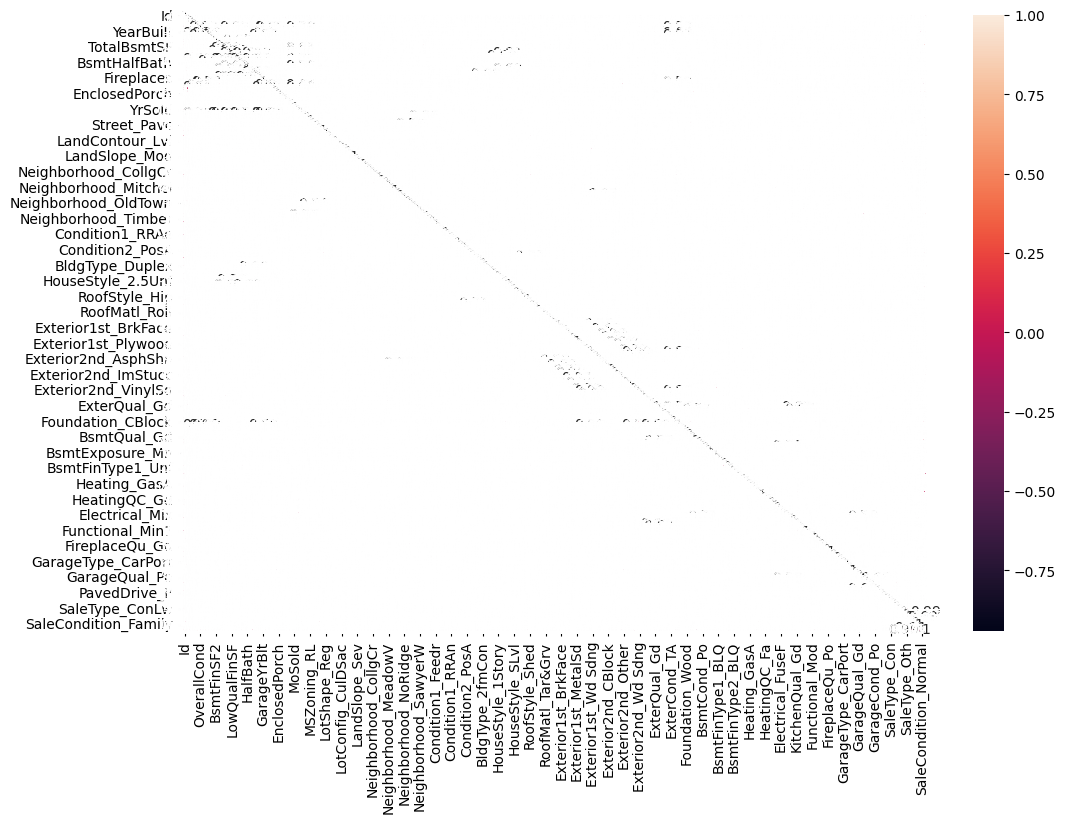

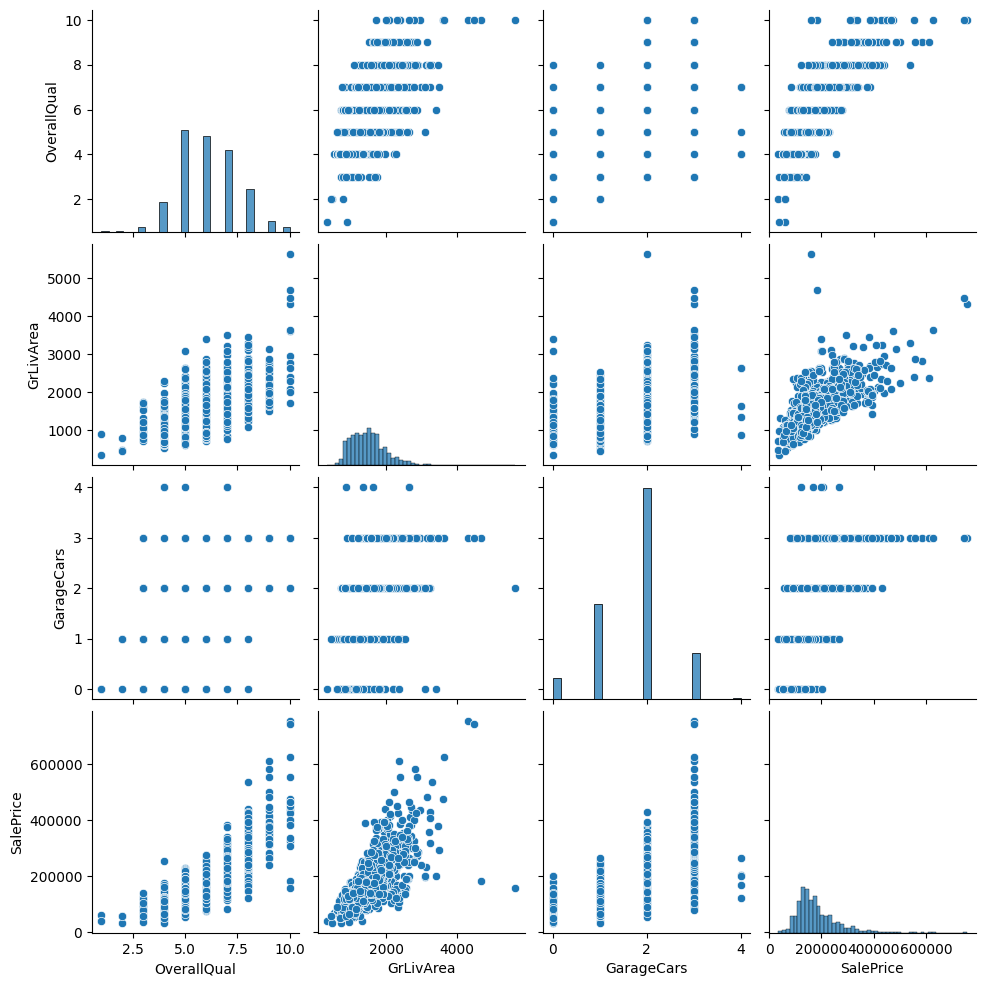

In [19]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# a. Распределение SalePrice
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.show()

# b. Корреляции
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True)
plt.show()

# c. характеристики
important_features = ['OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df[important_features + ['SalePrice']])
plt.show()

# d. One-hot encoding для категориальных переменных
data = pd.get_dummies(df, drop_first=True)

# Сохранение данных
data.to_csv('cleaned_house_prices.csv', index=False)
